In [1]:
from manim import *

library_wide: /opt/anaconda3/envs/manim/lib/python3.9/site-packages/manim/_config/default.cfg
user_wide: /Users/linus/.config/manim/manim.cfg
folder_wide: manim.cfg


Manim Community v0.16.0.post0

In [2]:
%%manim -v WARNING --disable_caching -ql -s Example1

# 这里之所以保ValueError，是因为manim.cfg里面设置了medir_dir参数
class Example1(Scene):
    def construct(self):
        self.add(Circle())

ValueError: '/Users/linus/Desktop/linus_manim_media/images/example_scenes/Example1_ManimCE_v0.16.0.post0.png' is not in the subpath of '/Users/linus/Desktop/linus_manim/example_scenes' OR one path is relative and the other is absolute.

In [3]:
%%manim -v WARNING --disable_caching -qm HelloManim

# set the maximum width for video outputs to a predefined value
config.media_width = "20vw"
# embed video
config.media_embed = True

class HelloManim(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        banner_large = ManimBanner(dark_theme=False).scale(0.7)
        self.play(banner_large.create())
        self.play(banner_large.expand())

In [10]:
# 研究下add_updater

class UpdatersExample(Scene):
    def construct(self):
        decimal = DecimalNumber(
            0,
            show_ellipsis=True,
            num_decimal_places=3,
            include_sign=True,
        )
        square = Square().to_edge(UP)

        decimal.add_updater(lambda d: d.next_to(square, RIGHT))
        decimal.add_updater(lambda d: d.set_value(square.get_center()[1]))
        self.add(square, decimal)
        self.play(
            square.animate.to_edge(DOWN),
            rate_func=there_and_back,
            run_time=5,
        )
        self.wait()

with tempconfig({"quality": "medium_quality", "preview": True, "verbosity" : 'WARNING'}):
    scene = UpdatersExample()
    scene.render()

In [5]:
class NextToUpdater(Scene):

    '''
    It is not recommended to override the ``__init__`` method in user Scenes.  For code
    that should be ran before a Scene is rendered, use :meth:`Scene.setup` instead.
    '''
    def setup(self):
        print("ready for rendering")
 
    def construct(self):

        print("renderring...")
        def dot_position(mobject):
            mobject.set_value(dot.get_center()[0])
            mobject.next_to(dot)

        dot = Dot(RIGHT*3)
        label = DecimalNumber()
        label.add_updater(dot_position) #dot_position函数里的参数mobjet就是label
        self.add(dot, label)

        self.play(Rotating(dot, about_point=ORIGIN, angle=TAU, run_time=TAU, rate_func=linear))

    def tear_down(self):
        print("render has done")

with tempconfig({"quality": "medium_quality", "preview": True, "verbosity" : 'WARNING'}):
    scene = NextToUpdater()

    # 依次执行setup、construct和tear_down函数
    scene.render() 

    print(scene.mobjects)

    # 通过scene可以拿到所有的mobject
    # 通过mobject可以拿到每个mobject上的updaters
    for i in range(len(scene.mobjects)):
        print(scene.mobjects[i].updaters)
        print(scene.mobjects[i].__class__)    
    
    print(scene.__str__())
    print(scene.__class__.__name__)

ready for rendering
renderring...


render has done
[Dot, DecimalNumber]
[]
Dot
[<function NextToUpdater.construct.<locals>.dot_position at 0x147969670>]
DecimalNumber
NextToUpdater
NextToUpdater


In [31]:
class DtUpdater(Scene):
    def construct(self):
        line = Square()

        #Let the line rotate 90° per second
        line.add_updater(lambda mobject, dt: mobject.rotate(dt*90*DEGREES))
        self.add(line)
        self.wait(2)

DtUpdater().render()

In [18]:
from manim import *

class SoundExample(Scene):
    def construct(self):
        dot = Dot().set_color(GREEN)
        self.add_sound("click.wav")
        self.add(dot)
        self.wait()
        self.add_sound("click.wav")
        dot.set_color(BLUE)
        self.wait()
        self.add_sound("click.wav")
        dot.set_color(RED)
        self.wait()

# 视频相对于图文来说是一种更高级的表达方式
# 动画+声音这是视频的独特优势
# 为何只想一声？
with tempconfig({"assets_dir": '../'}):

    SoundExample().render()

In [7]:
# In Python 3 either using type() to check for the type or __class__ will return the same result.

class C:pass

ci=C()
print(type(ci)) #<class '__main__.C'>
print(ci.__class__) #<class '__main__.C'>

<class '__main__.C'>
<class '__main__.C'>


In [8]:
'''
This makes sense: Mobject is not supposed to be used as an actual object that is displayed on screen; 
in fact the camera (which we will discuss later in more detail; 
it is the class that is, for the Cairo renderer, 
responsible for “taking a picture” of the current scene) 
does not process “pure” Mobjects in any way, they cannot even appear in the rendered output.
'''

'\nThis makes sense: Mobject is not supposed to be used as an actual object that is displayed on screen; \nin fact the camera (which we will discuss later in more detail; \nit is the class that is, for the Cairo renderer, \nresponsible for “taking a picture” of the current scene) \ndoes not process “pure” Mobjects in any way, they cannot even appear in the rendered output.\n'

In [11]:
from manim import *

class ImageInterpolationEx(Scene):
    def construct(self):
        img = ImageMobject(np.uint8([[63, 0, 0, 0],
                                        [0, 127, 0, 0],
                                        [0, 0, 191, 0],
                                        [0, 0, 0, 255]
                                        ]))

        img.height = 2
        img1 = img.copy()
        img2 = img.copy()
        img3 = img.copy()
        img4 = img.copy()
        img5 = img.copy()

        img1.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        img2.set_resampling_algorithm(RESAMPLING_ALGORITHMS["lanczos"])
        img3.set_resampling_algorithm(RESAMPLING_ALGORITHMS["linear"])
        img4.set_resampling_algorithm(RESAMPLING_ALGORITHMS["cubic"])
        img5.set_resampling_algorithm(RESAMPLING_ALGORITHMS["box"])
        img1.add(Text("nearest").scale(0.5).next_to(img1,UP))
        img2.add(Text("lanczos").scale(0.5).next_to(img2,UP))
        img3.add(Text("linear").scale(0.5).next_to(img3,UP))
        img4.add(Text("cubic").scale(0.5).next_to(img4,UP))
        img5.add(Text("box").scale(0.5).next_to(img5,UP))

        x= Group(img1,img2,img3,img4,img5)
        x.arrange()
        self.add(x)

ImageInterpolationEx().render()

In [14]:
from manim import *

class PMobjectExample(Scene):
    def construct(self):

        pG = PGroup()  # This is just a collection of PMobject's

        # As the scale factor increases, the number of points
        # removed increases.
        for sf in range(1, 9 + 1):
            p = PointCloudDot(density=20, radius=1).thin_out(sf)
            # PointCloudDot is a type of PMobject
            # and can therefore be added to a PGroup
            pG.add(p)

        # This organizes all the shapes in a grid.
        pG.arrange_in_grid()

        self.add(pG)

PMobjectExample().render()

ValueError: '/Users/linus/Desktop/linus_manim_media/images/example_scenes/PMobjectExample_ManimCE_v0.16.0.post0.png' is not in the subpath of '/Users/linus/Desktop/linus_manim/example_scenes' OR one path is relative and the other is absolute.

This is where different types of mobjects come into play.   
Roughly speaking, the Cairo renderer setup knows three different types of mobjects that can be rendered:
* ImageMobject
* PMobject
* VMobject

In [ ]:
'''
As just mentioned, VMobjects represent vectorized mobjects. 
To render a VMobject, the camera looks at the points attribute of a VMobject 
and divides it into sets of four points each. 
Each of these sets is then used to construct a cubic Bézier curve 
with the first and last entry describing the end points of the curve (“anchors”), 
and the second and third entry describing the control points in between (“handles”).
'''

'''
In contrast to Mobject, VMobject can be displayed on screen 
(even though, technically, it is still considered a base class). 
'''

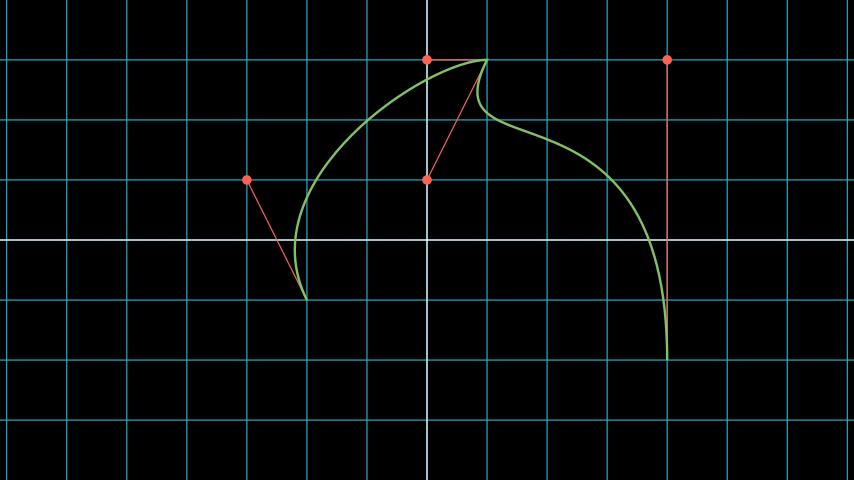

In [23]:
%%manim -v WARNING --disable_caching -ql -s --media_dir ./media VMobjectDemo 

from manim import *

'''
In contrast to Mobject, VMobject can be displayed on screen 
(even though, technically, it is still considered a base class). 
To illustrate how points are processed, 
consider the following short example of a VMobject with 8 points 
(and thus made out of 8/4 = 2 cubic Bézier curves). 
The resulting VMobject is drawn in green. 
The handles are drawn as red dots with a line to their closest anchor.
'''
class VMobjectDemo(Scene):
    def construct(self):
        plane = NumberPlane()
        my_vmobject = VMobject(color=GREEN)
        my_vmobject.points = [
            np.array([-2, -1, 0]),  # start of first curve
            np.array([-3, 1, 0]),
            np.array([0, 3, 0]),
            np.array([1, 3, 0]),  # end of first curve
            np.array([1, 3, 0]),  # start of second curve
            np.array([0, 1, 0]),
            np.array([4, 3, 0]),
            np.array([4, -2, 0]),  # end of second curve
        ]
        handles = [
            Dot(point, color=RED) for point in
            [[-3, 1, 0], [0, 3, 0], [0, 1, 0], [4, 3, 0]]
        ]
        handle_lines = [
            Line(
                my_vmobject.points[ind],
                my_vmobject.points[ind+1],
                color=RED,
                stroke_width=2
            ) for ind in range(0, len(my_vmobject.points), 2)
        ]
        self.add(plane, *handles, *handle_lines, my_vmobject)

# VMobjectDemo().render()

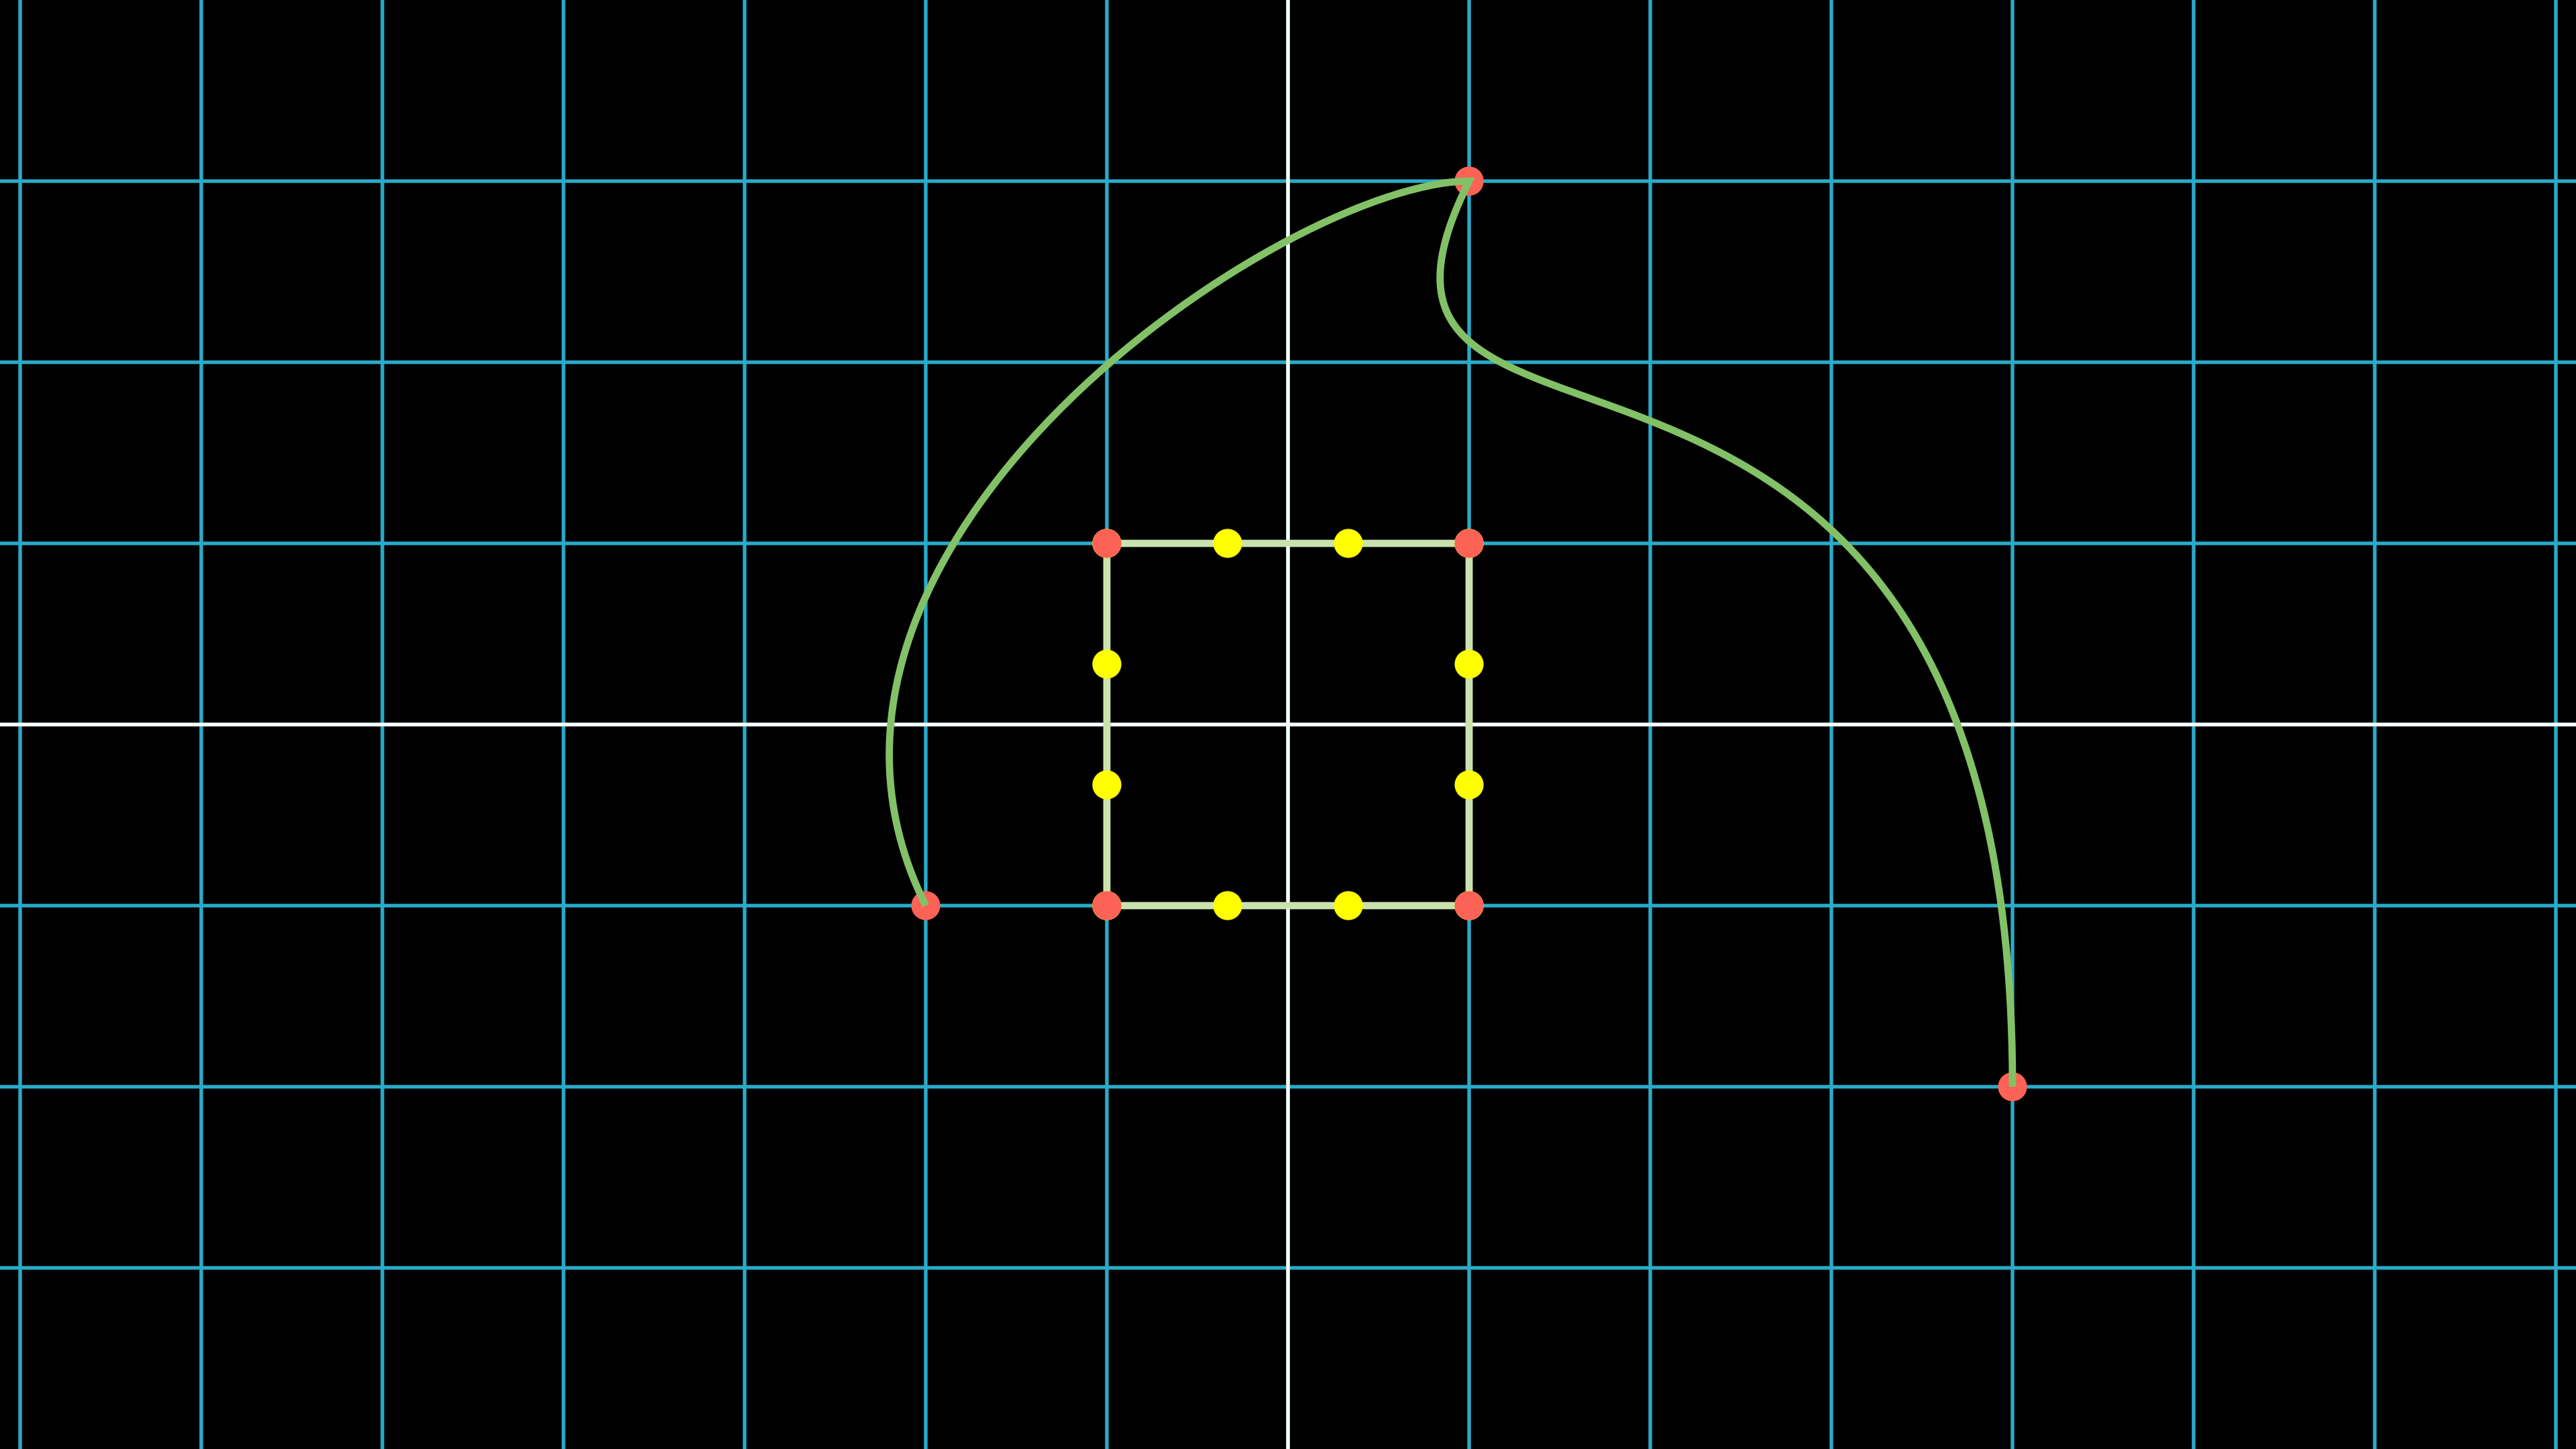

In [55]:
%%manim -v WARNING --disable_caching -qk -s --media_dir ./media VMobjectDemo1

from manim import *

class VMobjectDemo1(Scene):
    def construct(self):
        plane = NumberPlane()
        my_vmobject = VMobject(color=GREEN)
        my_vmobject.points = [
            np.array([-2, -1, 0]),  # start of first curve
            np.array([-3, 1, 0]),
            np.array([0, 3, 0]),
            np.array([1, 3, 0]),  # end of first curve
            np.array([1, 3, 0]),  # start of second curve
            np.array([0, 1, 0]),
            np.array([4, 3, 0]),
            np.array([4, -2, 0]),  # end of second curve
        ]
        handles = [
            Dot(point, color=RED) for point in
            [[-2, -1, 0], [1, 3, 0], [1, 3, 0], [4, -2, 0]]
        ]
        
        my_square = Square(color=GREEN_A)

        square_anchor_points = [
            my_square.points[0],
            my_square.points[3],
            my_square.points[7],
            my_square.points[11]
        ]
        square_anchors = [Dot(point, color=RED) for point in square_anchor_points]

        square_handles = [Dot(point, color=YELLOW) for point in my_square.points]

        self.add(plane, *handles, my_vmobject, my_square, *square_handles, *square_anchors)


In [57]:
class PolygonExample(Scene):
    def construct(self):
        plane = NumberPlane()
        isosceles = Polygon([-5, 1.5, 0], [-2, 1.5, 0], [-3.5, -2, 0])
        position_list = [
            [4, 1, 0],  # middle right
            [4, -2.5, 0],  # bottom right
            [0, -2.5, 0],  # bottom left
            [0, 3, 0],  # top left
            [2, 1, 0],  # middle
            [4, 3, 0],  # top right
        ]
        square_and_triangles = Polygon(*position_list, color=PURPLE_B)
        self.add(plane, isosceles, square_and_triangles)

PolygonExample().render()

In [7]:
import numpy as np
from manim import *

class PolygramExample(Scene):
    def construct(self):
        plane = NumberPlane()
        # 两个三角形
        hexagram = Polygram(
            [[0, 2, 0], [-np.sqrt(3), -1, 0], [np.sqrt(3), -1, 0]],
            [[-np.sqrt(3), 1, 0], [0, -2, 0], [np.sqrt(3), 1, 0]],
        )
        self.add(hexagram)

        dot = Dot()
        self.add(plane)
        self.play(MoveAlongPath(dot, hexagram), run_time=5, rate_func=linear)
        self.remove(dot)
        self.wait()

PolygramExample().render()

In [5]:
from manim import *

class LagRatios(Scene):
    def construct(self):
        ratios = [0, 0.1, 0.5, 1, 2]  # demonstrated lag_ratios

        # Create dot groups
        group = VGroup(*[Dot() for _ in range(4)]).arrange_submobjects()
        groups = VGroup(*[group.copy() for _ in ratios]).arrange_submobjects(buff=1)
        self.add(groups)

        # Label groups
        self.add(Text("lag_ratio = ", font_size=36).next_to(groups, UP, buff=1.5))
        for group, ratio in zip(groups, ratios):
            self.add(Text(str(ratio), font_size=36).next_to(group, UP))

        #Animate groups with different lag_ratios
        self.play(AnimationGroup(*[
            group.animate(lag_ratio=ratio, run_time=1.5).shift(DOWN * 2)
            for group, ratio in zip(groups, ratios)
        ]))

        # # lag_ratio also works recursively on nested submobjects:
        self.play(groups.animate(run_time=1, lag_ratio=0.1).shift(UP * 2))

LagRatios().render()

In [4]:
class TransformPathArc(Scene):
        def construct(self):
            def make_arc_path(start, end, arc_angle):
                points = []
                p_fn = path_along_arc(arc_angle)
                # alpha animates between 0.0 and 1.0, where 0.0
                # is the beginning of the animation and 1.0 is the end.
                for alpha in range(0, 11):
                    points.append(p_fn(start, end, alpha / 10.0))
                path = VMobject(stroke_color=YELLOW)
                path.set_points_smoothly(points)
                return path

            left = Circle(stroke_color=BLUE_E, fill_opacity=1.0, radius=0.5).move_to(LEFT * 2)
            colors = [TEAL_A, TEAL_B, TEAL_C, TEAL_D, TEAL_E, GREEN_A]
            # Positive angles move counter-clockwise, negative angles move clockwise.
            examples = [-90, 0, 30, 90, 180, 270]
            anims = []
            for idx, angle in enumerate(examples):
                left_c = left.copy().shift((3 - idx) * UP)
                left_c.fill_color = colors[idx]
                right_c = left_c.copy().shift(4 * RIGHT)
                path_arc = make_arc_path(left_c.get_center(), right_c.get_center(),
                                            arc_angle=angle * DEGREES)
                desc = Text('%d°' % examples[idx]).next_to(left_c, LEFT)
                # Make the circles in front of the text in front of the arcs.
                self.add(
                    path_arc.set_z_index(1),
                    desc.set_z_index(2),
                    left_c.set_z_index(3),
                )
                anims.append(Transform(left_c, right_c, path_arc=angle * DEGREES))

            self.play(*anims, run_time=2)
            self.wait()

TransformPathArc().render()

In [17]:
'''
s.animate.shift(RIGHT*5)生成的是一个Animation对象。
An animation object holds all the information necessary for the renderer to generate the corresponding frames.
所谓的play就是一阵阵播放这个Animation对象。

在Animation对象中有一个特别重要的函数：
Animation.interpolate() is the method that updates the mobject attached to 
the animation to the corresponding animation completion percentage. 
For example, if in the render loop, some_animation.interpolate(0.5) is called, 
the attached mobject will be updated to the state where 50% of the animation are completed.

Square对象平移后可以发现，对象的点坐标发生了变化，说明：发生在对象上的animation会更新对象的一些属性，最明显的就是坐标。


'''

from manim import *

class AnimateExample(Scene):
    def construct(self):
        plane = NumberPlane()
        
        s = Square()
        s_points = [Dot(point, color=YELLOW) for point in s.points]
        print(s.points)
        self.add(plane, s, *s_points)

        self.play(s.animate.shift(RIGHT*5))
        print(isinstance(s.animate.shift(RIGHT*5), Animation)) # 为何是False

        s_points = [Dot(point, color=RED) for point in s.points]
        print(s.points)
        self.add(*s_points)

        self.wait(1)
AnimateExample().render()

[[ 1.          1.          0.        ]
 [ 0.33333333  1.          0.        ]
 [-0.33333333  1.          0.        ]
 [-1.          1.          0.        ]
 [-1.          1.          0.        ]
 [-1.          0.33333333  0.        ]
 [-1.         -0.33333333  0.        ]
 [-1.         -1.          0.        ]
 [-1.         -1.          0.        ]
 [-0.33333333 -1.          0.        ]
 [ 0.33333333 -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -0.33333333  0.        ]
 [ 1.          0.33333333  0.        ]
 [ 1.          1.          0.        ]]
linus animation starts


linus animation ends
False
[[ 6.          1.          0.        ]
 [ 5.33333333  1.          0.        ]
 [ 4.66666667  1.          0.        ]
 [ 4.          1.          0.        ]
 [ 4.          1.          0.        ]
 [ 4.          0.33333333  0.        ]
 [ 4.         -0.33333333  0.        ]
 [ 4.         -1.          0.        ]
 [ 4.         -1.          0.        ]
 [ 4.66666667 -1.          0.        ]
 [ 5.33333333 -1.          0.        ]
 [ 6.         -1.          0.        ]
 [ 6.         -1.          0.        ]
 [ 6.         -0.33333333  0.        ]
 [ 6.          0.33333333  0.        ]
 [ 6.          1.          0.        ]]


linus animation starts


linus animation ends
Square
Circle


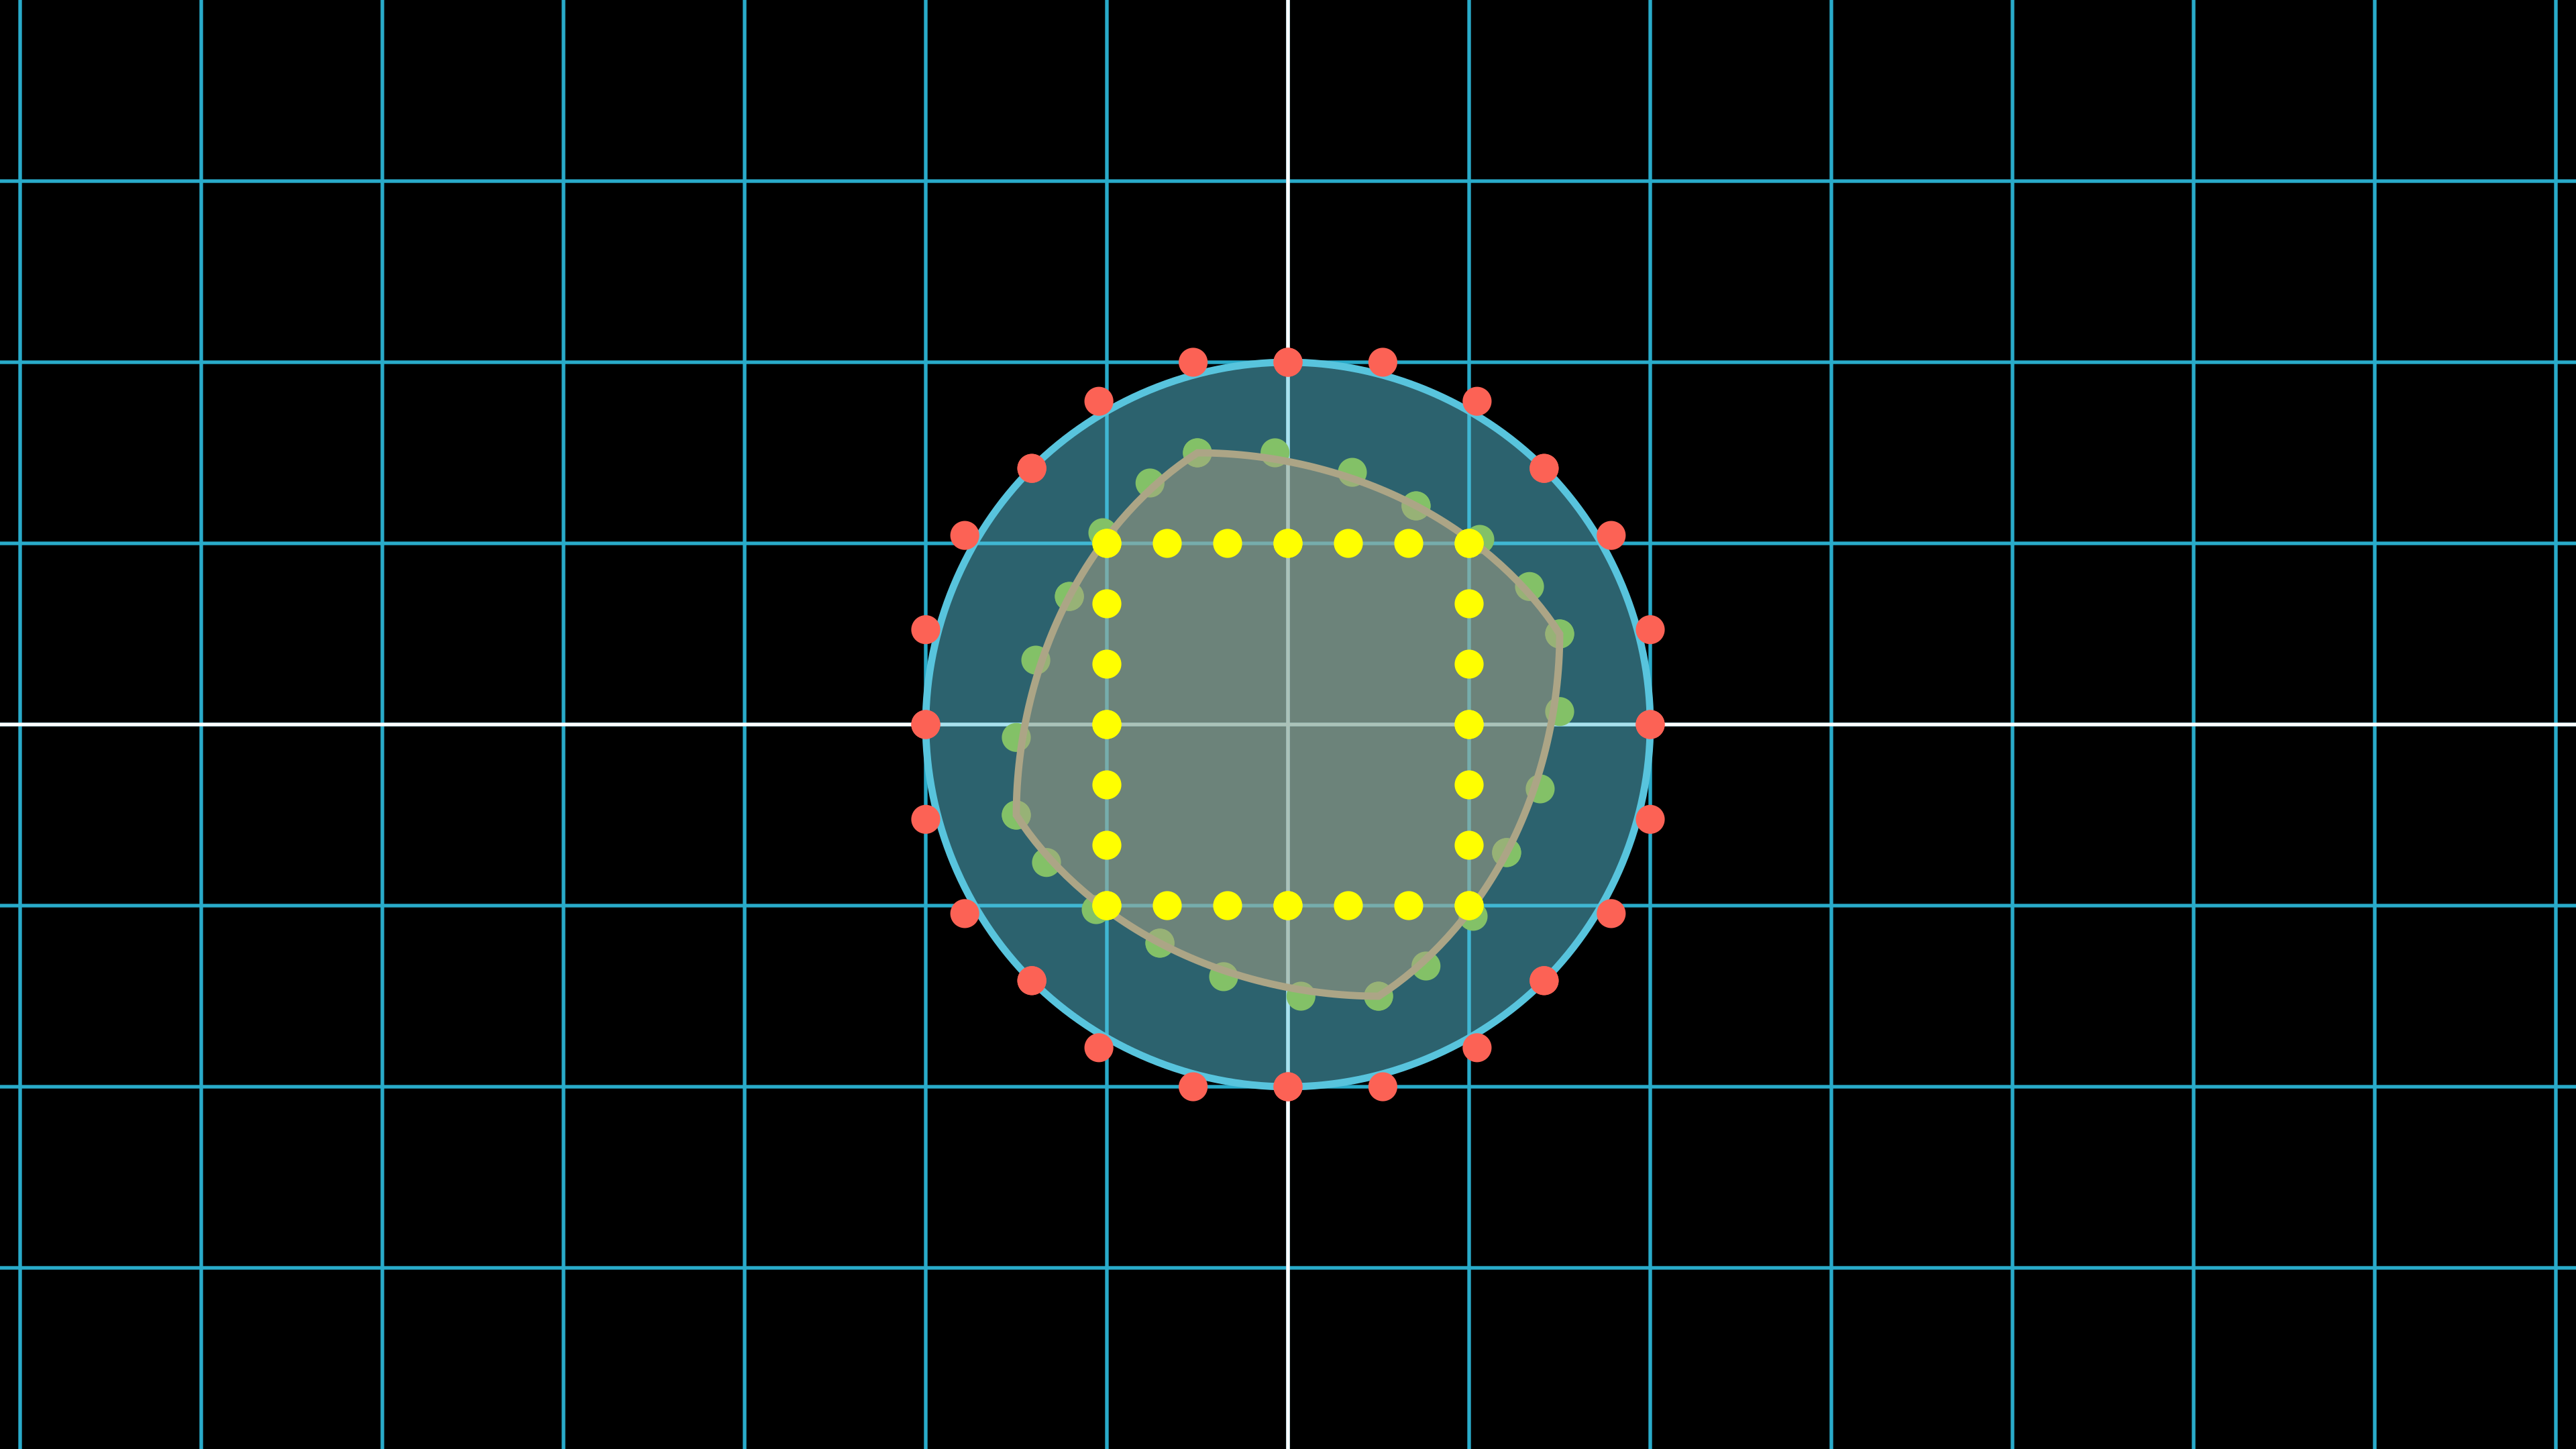

In [27]:
%%manim -v WARNING --disable_caching -qk -s --media_dir ./media ToyExample

from manim import *

class ToyExample(Scene):
    def construct(self):
        plane = NumberPlane()
        orange_square = Square(color=ORANGE, fill_opacity=0.5)
        blue_circle = Circle(color=BLUE, fill_opacity=0.5).scale(2)
        self.add(orange_square, plane)
        
        rep = ReplacementTransform(orange_square, blue_circle, run_time=3)
        self.play(rep) # 只有play这个animation，执行begin以及finish函数后，才会更新rep的属性

        # play完animation之后，才可以使用interpolate函数
        rep.interpolate(0.5)
        m_points = [Dot(point, color=GREEN) for point in rep.mobject.points]
        self.add(*m_points, rep.mobject)

        print(rep.starting_mobject)
        s_points = [Dot(point, color=YELLOW) for point in rep.starting_mobject.points]
        self.add(*s_points)

        print(rep.target_mobject)
        t_points = [Dot(point, color=RED) for point in rep.target_mobject.points]
        self.add(*t_points)

        self.wait()

# starting_mobject：animation开始的mobject，interpolate(0)
# target_mobject：animation结束的mobject，interpolate(1)
# mobject：animation中途的mobject，interpolate(0.5)

# 疑问：为何只有animation被play之后才可以使用interpolate函数
# with tempconfig({"quality": "medium_quality", "preview": True}):
#     scene = ToyExample()
#     scene.render()